In [1]:
from PyFuncs import Functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[  474.  1300.  2500.  2900.  8150.  8400. 11200. 11450. 12000. 12100.
 16000. 16700. 18400. 18700. 21900. 22200. 24000. 24300. 25250. 25900.
 27570. 27760. 27860. 28670. 29670. 32120. 32400. 33910. 34050. 35780.
 36250. 43000. 43220. 50600. 50800. 51540. 51900. 53730. 54230. 57750.
 57960. 58460. 58660. 59360. 59680. 62360. 62700. 63380. 63560. 63748.
 64000. 71000. 71300. 71880. 72090. 80250. 80640. 85090. 85390. 85610.
 85830. 87760. 87860. 90100. 90250. 96940. 97160.]


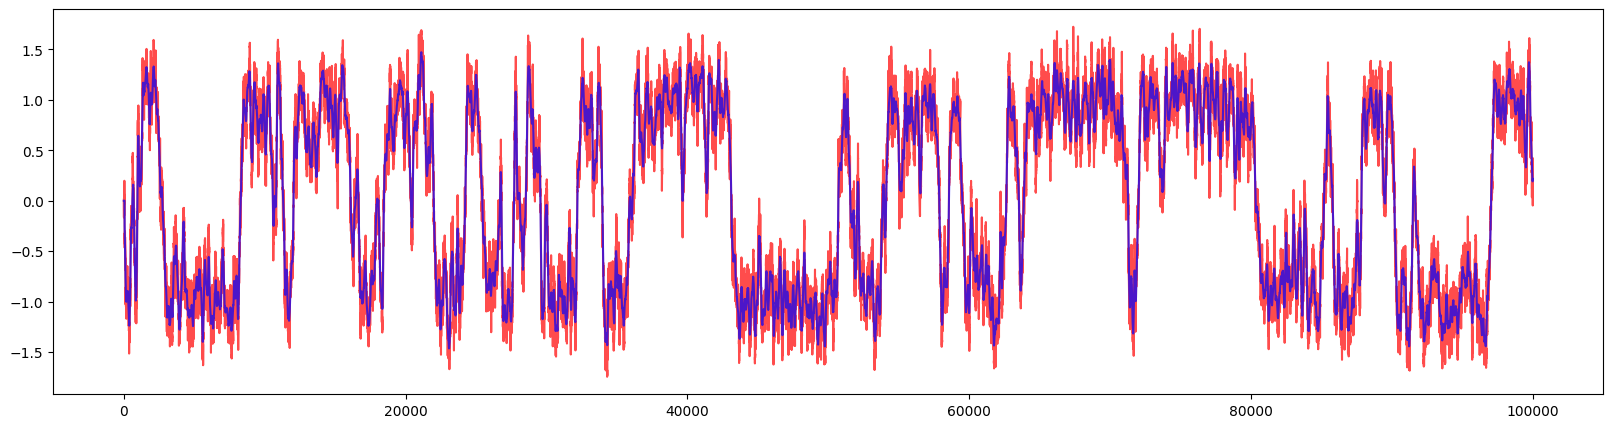

In [2]:
data = np.loadtxt("data/Langevin_1D.txt")
cps = np.loadtxt("data/ChangePts.txt")

denoised_data = Functions.knearest_denoising(data, 50)
df = pd.DataFrame(denoised_data)
df = df.fillna(0)
denoise = df.values.tolist()

plt.figure(figsize=(20, 5))
plt.plot(np.arange(100000), data[:100000], 'r', alpha=0.7)
plt.plot(np.arange(100000), denoise, 'b', alpha=0.7)

print(cps)

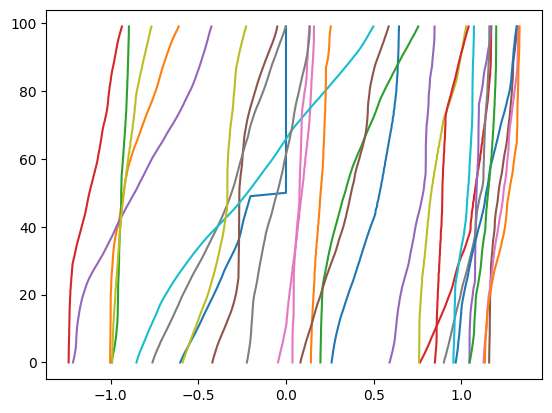

In [6]:
def flatten_concatenation(matrix):
    flat_list = []
    for row in matrix:
        flat_list += row
    return flat_list

flat = flatten_concatenation(denoise)

bins = np.array_split(flat, int(len(data) / 100))



for i in range(0, 29):
    plt.plot(np.sort(bins[i]), np.arange(100))

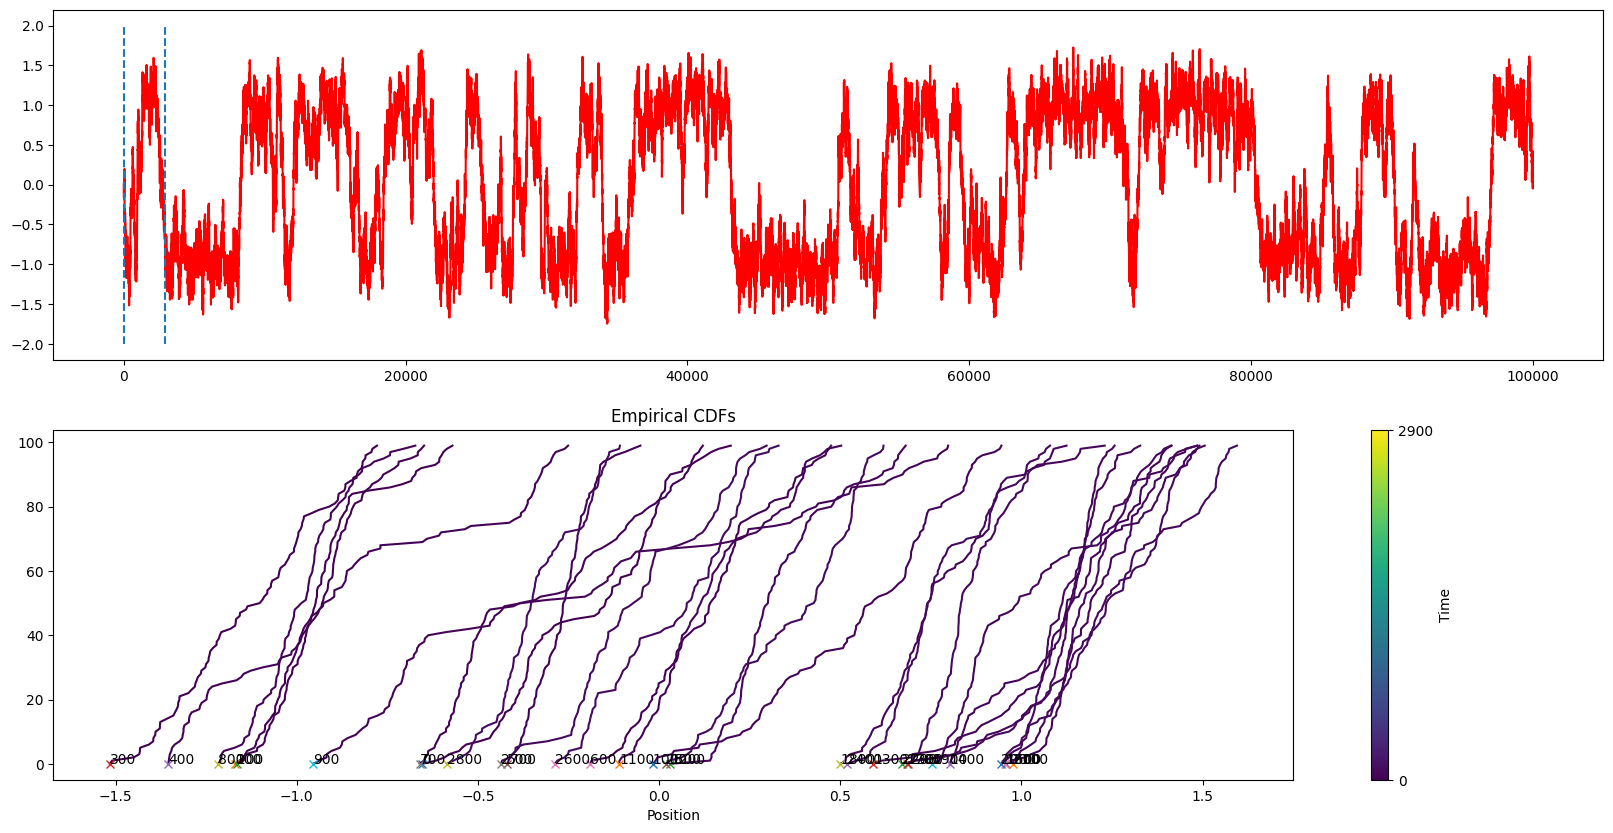

In [8]:
Functions.plt_empirical_cdf(data, 0, 29, 100)

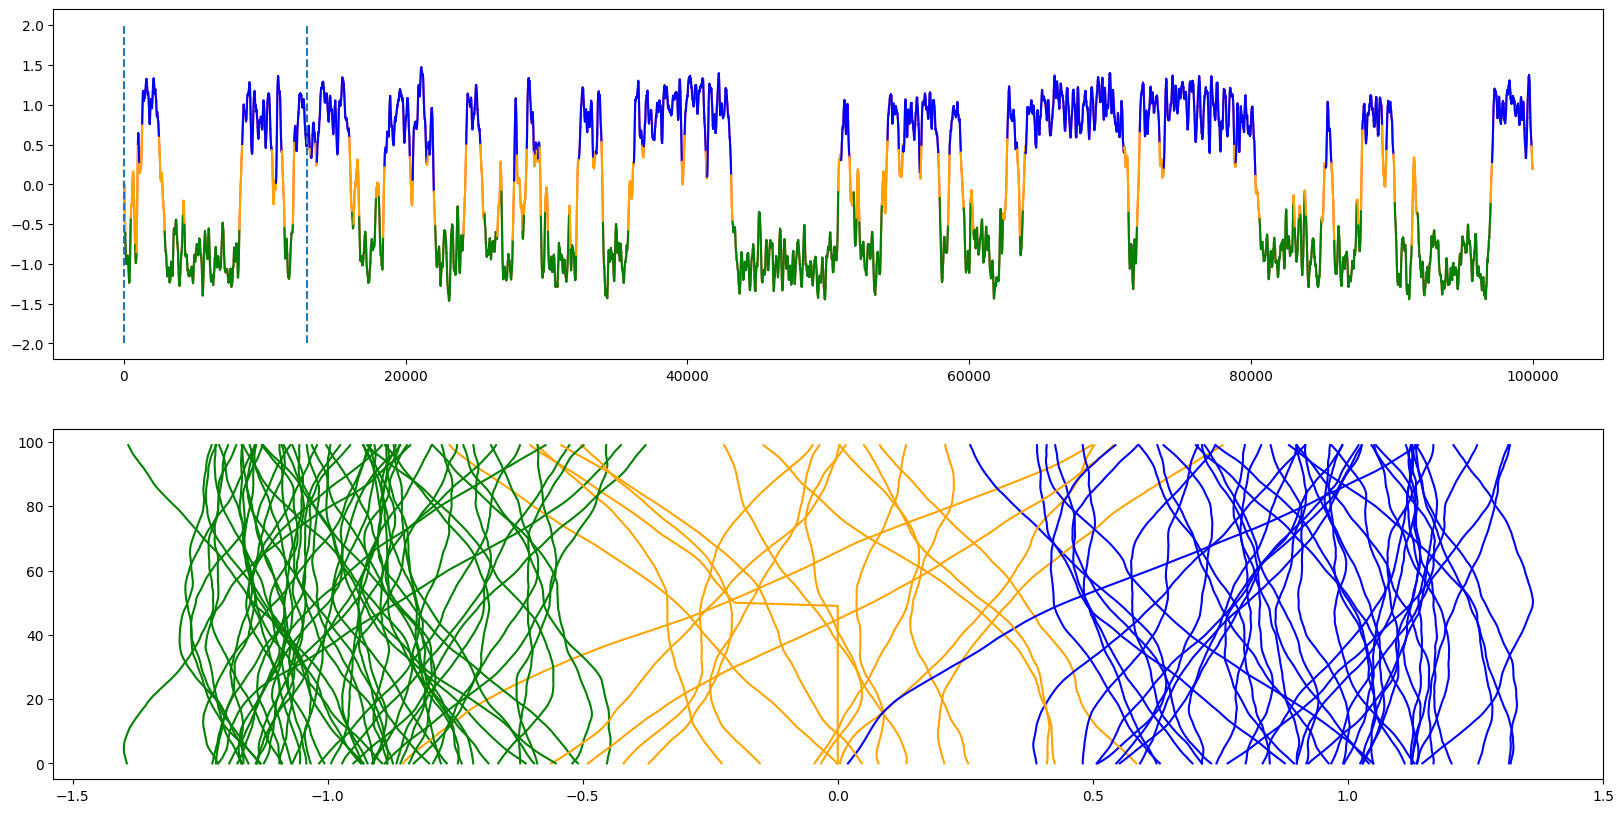

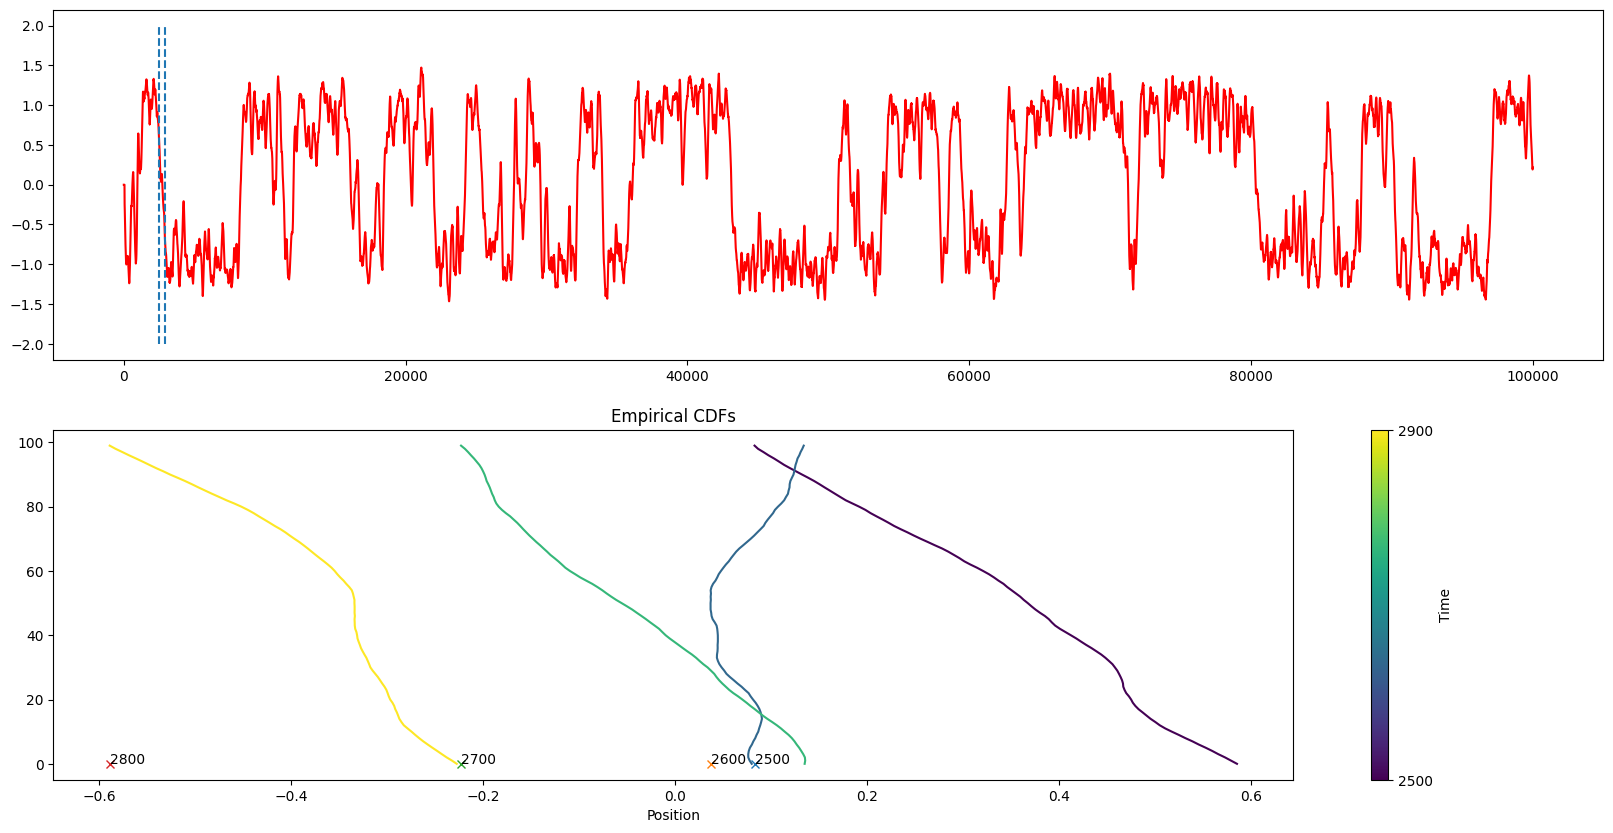

In [19]:
labels = Functions.ECDF_cluster_spectral(flat, 100, 3)

Functions.plt_cluster_cdf(denoise, labels, 0, 130, 100)
Functions.plt_empirical_cdf(denoise, 25, 29, 100)